# Basic Usage

This tutorial will go through the basic usage of tiltlib, such as how to initialize a sample, and plotting

In [1]:
# Import the necessary packages
%matplotlib inline
from orix.vector import Miller, Vector3d
import numpy as np

from tiltlib import Axis, Sample

## Axis initialization
To rotate a sample, one needs rotation axes.
In tiltlib, these are represented as `Axis` objects.
These are initialized with a direction and a tilt range.

In [2]:
x_tilt_axis = Axis(
    Vector3d.xvector(),
    min = -30,
    max = 30,
    degrees = True,
)
x_tilt_axis

Axis:
        direction = [1, 0, 0]
        angle = 0.00 degrees
        range: (-30.00, 30.00) degrees
        extrinsic

## Sample initialization

The main workhorse of tiltlib is the `Sample`. 
This object consists of crystal orientations, and rotation axes.

This can be initialized in two ways: with a `CrystalMap` from Orix, or with `Orientation` and a `Phase` (also from Orix). 

In [3]:
## Orientations

from orix.quaternion import Orientation
from orix.crystal_map import Phase

# Make a hexagonal crystal.
# The default lattice is cubic, so we edit it
phase = Phase(point_group="6/mmm")
phase.structure.lattice.setLatPar(gamma=120)

# Make some random data
oris = Orientation.random((10, 10))
oris.symmetry = phase.point_group
oris = oris.map_into_symmetry_reduced_zone()

# Initialize the sample
sample = Sample(oris, phase, [x_tilt_axis])
sample

Sample:
Axis:
        direction = [1, 0, 0]
        angle = 0.00 degrees
        range: (-30.00, 30.00) degrees
        extrinsic

In [4]:
## CrystalMap

# Download a crystal map supplied by Orix
from orix.data import sdss_austenite
raw_xmap = sdss_austenite(allow_download=True)

# Initialize the sample object
sample = Sample.from_crystal_map(raw_xmap, [x_tilt_axis])

sample

Sample:
Axis:
        direction = [1, 0, 0]
        angle = 0.00 degrees
        range: (-30.00, 30.00) degrees
        extrinsic

## Cropping

`Sample`s can be cropped with Hyperspy ROIs

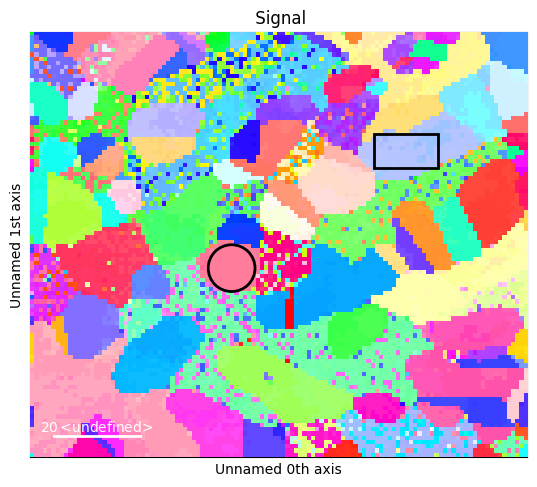

In [5]:
# Create an IPF navigation signal
nav = sample.to_navigator()
nav.plot()

# Create ROIs
from hyperspy.roi import RectangularROI, CircleROI

rect = RectangularROI(left=81, top=24, right=96, bottom=32)
rect.interactive(nav, color="black")

circ = CircleROI(cx=47, cy=55, r=5.5, r_inner=0)

# For some reason, numpy throws an error with the circle
try:
    circ.interactive(nav, color="black")
except np.exceptions.DTypePromotionError:
    pass

In [6]:
rect_sample = sample.crop(rect)
circ_sample = sample.crop(circ)

## Plotting

There are multiple plotting tools directly available from the `Sample` object.
Additionally, the `Orientation` member is always up-to-date with the rotation of the sample, making them available for custom plotting.

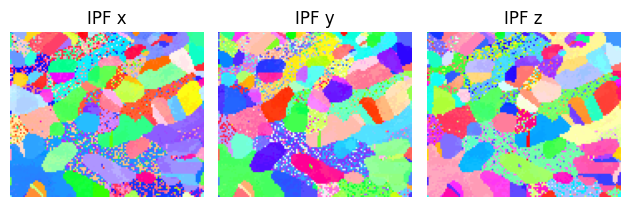

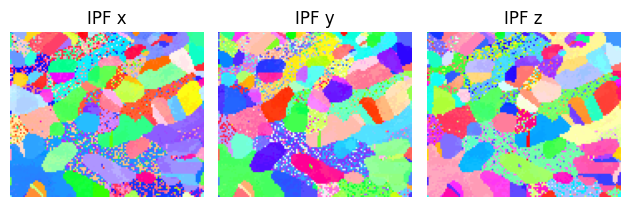

In [7]:
## IPF colormap
sample.plot()

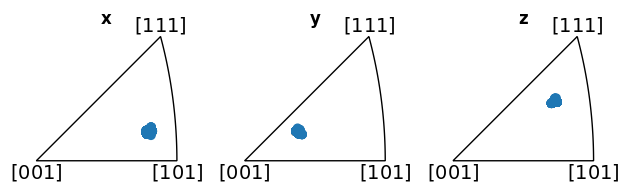

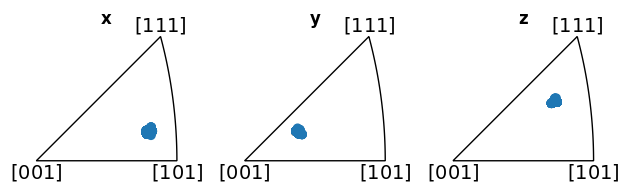

In [8]:
## Orientations as IPF scatterplot
# Use one of the crops, as the full sample has so many different orientations
rect_sample.plot_orientations()

## Interactive plotting

Some plotting functionality of tiltlib is interactive, where you control the tilt axes with sliders

C:\Users\vilja\Documents\tiltlib\src\tiltlib\sample.py:199: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  tilt_slider = Slider(


(<Figure size 640x480 with 4 Axes>,
 (<matplotlib.widgets.Slider at 0x206bdf27b20>,))

c:\Users\vilja\Documents\tiltlib\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


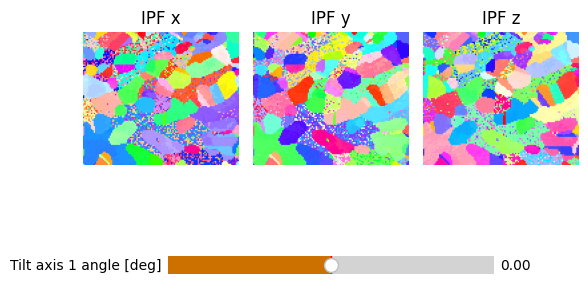

In [9]:
# IPF colormaps
sample.plot_interactive()

C:\Users\vilja\Documents\tiltlib\src\tiltlib\sample.py:271: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  tilt_slider = Slider(


(<Figure size 640x480 with 4 Axes>,
 (<matplotlib.widgets.Slider at 0x206c046eec0>,))

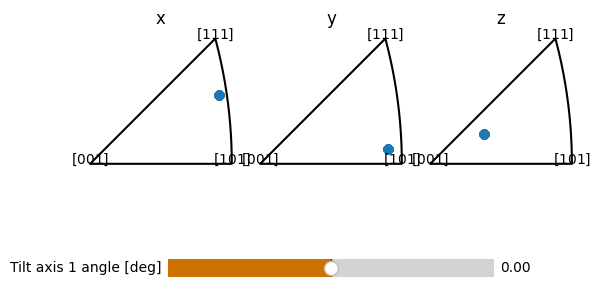

In [10]:
# IPF scatterplot
circ_sample.plot_orientations_interactive()